In [1]:
import pandas as pd
# import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import numpy as np
from pandas.api.types import is_numeric_dtype




In [25]:
missing_value ={"N/a", "na", np.nan}
df = pd.read_excel(os.path.abspath(os.path.join('../'))+"/data/Week1_challenge_data_source.xlsx",na_values=missing_value)

Display some of the data

In [26]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [27]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [29]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values per column
    mis_val = df.isnull().sum()
    # Total missing values
    
    mis_values=mis_val.sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def fill_missing_values_with_mean(df,col):
    df[col] = df[col].fillna(df[col].mean())#, inplace=True)
    return df

def fill_missing_values_with_median(df,col):
    df[col] = df[col].fillna(df[col].median())#, inplace=True)

    return df
    
def fill_missing_values_with_mode(df,col):
    df[col] = df[col].fillna(df[col].mode())[0]#, inplace=True)
    return df

def fill_missing_values_with_median(df,col):
    df[col] = df[col].fillna(df[col].median())#, inplace=True)

    return df

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_to_str(df,col):
    df[col] = df[col].astype(str)
    return df[col]

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    
    return df[bytes_data]

pd.options.display.float_format = format_float

Convert ids to string

In [30]:
df["Bearer Id"] = convert_to_str(df,"Bearer Id")
df["IMSI"] = convert_to_str(df,"IMSI")
df["IMEI"] = convert_to_str(df,"IMEI")
df["MSISDN/Number"] = convert_to_str(df,"MSISDN/Number")


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

Handle missing values

In [32]:
missing_values_table(df)

Your selected dataframe has 55 columns.
There are 37 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.80,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.60,float64
Nb of sec with 125000B < Vol DL,97538,65.00,float64
TCP UL Retrans. Vol (Bytes),96649,64.40,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.40,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.90,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.90,float64
TCP DL Retrans. Vol (Bytes),88146,58.80,float64
HTTP UL (Bytes),81810,54.50,float64
HTTP DL (Bytes),81474,54.30,float64


In [33]:
df_clean = df.copy()

columns = ["Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"Nb of sec with 125000B < Vol DL",
"TCP UL Retrans. Vol (Bytes)",
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 6250B < Vol DL < 31250B",
"TCP DL Retrans. Vol (Bytes)",
"HTTP UL (Bytes)",
"HTTP DL (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Nb of sec with Vol UL < 1250B",
"UL TP > 300 Kbps (%)",
"UL TP < 10 Kbps (%)",
"50 Kbps < UL TP < 300 Kbps (%)",
"10 Kbps < UL TP < 50 Kbps (%)",
"Nb of sec with Vol DL < 6250B",
"DL TP < 50 Kbps (%)",
"DL TP > 1 Mbps (%)",
"250 Kbps < DL TP < 1 Mbps (%)",
"50 Kbps < DL TP < 250 Kbps (%)"]
for name in columns:
    df_clean =  fill_missing_values_with_median(df_clean, name)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

In [34]:
columns = ["Last Location Name"]
for name in columns:
    df_clean = fill_missing_values_with_mode(df_clean, name)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

### Handling outliers

In [35]:
df_clean.describe()

,Start ms,End ms,Dur. (ms),Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,"150,000.00","150,000.00","150,000.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00","150,001.00","150,001.00",...,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,000.00","150,000.00"
mean,499.19,498.80,"104,608.56","9,164,566,995,485,186.00",97.77,15.32,"13,300.05","1,770.43","8,915,464.04","283,691.82",...,"11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","41,121,206.29","454,643,430.08"
std,288.61,288.10,"81,037.62",4.00,559.91,76.69,"23,971.88","4,625.36","117,658,237.11","15,780,125.06",...,"6,710,568.85","6,345,423.35","6,725,218.03","6,359,489.76","243,967,494.35","4,782,699.66","243,205,009.81","4,769,003.69","11,276,386.51","244,142,874.38"
min,0.00,0.00,"7,142.00","9,164,566,995,485,190.00",0.00,0.00,0.00,0.00,2.00,1.00,...,53.00,105.00,42.00,35.00,"2,516.00",59.00,"3,290.00",148.00,"2,866,892.00","7,114,041.00"
25%,250.00,251.00,"57,440.50","9,164,566,995,485,190.00",35.00,3.00,43.00,47.00,"568,730.00","20,949.50",...,"5,833,501.00","5,517,965.00","5,777,156.00","5,475,981.00","210,473,253.00","4,128,476.00","210,186,872.00","4,145,943.00","33,222,010.50","243,106,803.00"
50%,499.00,500.00,"86,399.00","9,164,566,995,485,190.00",45.00,5.00,63.00,63.00,"568,730.00","20,949.50",...,"11,616,019.00","11,013,447.00","11,642,217.00","10,996,384.00","423,408,104.00","8,291,208.00","421,803,006.00","8,267,071.00","41,143,312.00","455,841,077.50"
75%,749.00,750.00,"132,430.25","9,164,566,995,485,190.00",62.00,11.00,"19,710.75","1,120.00","568,730.00","20,949.50",...,"17,448,518.00","16,515,562.00","17,470,478.00","16,507,268.00","633,174,167.00","12,431,624.00","631,691,786.00","12,384,148.00","49,034,238.50","665,705,544.00"
max,999.00,999.00,"1,859,336.00","9,164,566,995,485,190.00","96,923.00","7,120.00","378,160.00","58,613.00","4,294,425,570.00","2,908,226,006.00",...,"23,259,098.00","22,011,962.00","23,259,189.00","22,011,955.00","843,441,889.00","16,558,794.00","843,442,489.00","16,558,816.00","78,331,311.00","902,969,616.00"


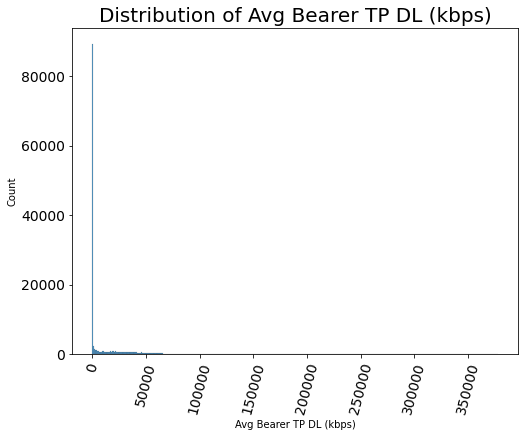

In [36]:
# plot the distribution of all columns
# for col in df_clean.columns.tolist():
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x="Avg Bearer TP DL (kbps)")
plt.title("Distribution of Avg Bearer TP DL (kbps)", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
# Considering most of the columns have normal distribution
# To remove outliers we can use statistical methods like removing values that lie 
# outside our 2,3 or 4 sigma depending on the size of our data
# We can also use ml sklearn localoutlierfactor library to calculate the distance
# between data points to determine the one with the largest distance 
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Start ms                                           499.00
End ms                                             499.00
Dur. (ms)                                       74,989.75
Last Location Name                                   0.00
Avg RTT DL (ms)                                     27.00
Avg RTT UL (ms)                                      8.00
Avg Bearer TP DL (kbps)                         19,667.75
Avg Bearer TP UL (kbps)                          1,073.00
TCP DL Retrans. Vol (Bytes)                          0.00
TCP UL Retrans. Vol (Bytes)                          0.00
DL TP < 50 Kbps (%)                                  9.00
50 Kbps < DL TP < 250 Kbps (%)                       4.00
250 Kbps < DL TP < 1 Mbps (%)                        1.00
DL TP > 1 Mbps (%)                                   0.00
UL TP < 10 Kbps (%)                                  1.00
10 Kbps < UL TP < 50 Kbps (%)                        0.00
50 Kbps < UL TP < 300 Kbps (%)                       0.00
UL TP > 300 Kb

In [38]:
cols = ["Start ms",
"End ms",
"Dur. (ms)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Avg Bearer TP DL (kbps)",
"Avg Bearer TP UL (kbps)",
"Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"Nb of sec with 125000B < Vol DL",
"TCP UL Retrans. Vol (Bytes)",
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 6250B < Vol DL < 31250B",
"TCP DL Retrans. Vol (Bytes)",
"HTTP UL (Bytes)",
"HTTP DL (Bytes)",
"Avg RTT DL (ms)",
"Avg RTT UL (ms)",
"Nb of sec with Vol UL < 1250B",
"UL TP > 300 Kbps (%)",
"UL TP < 10 Kbps (%)",
"50 Kbps < UL TP < 300 Kbps (%)",
"10 Kbps < UL TP < 50 Kbps (%)",
"Nb of sec with Vol DL < 6250B",
"DL TP < 50 Kbps (%)",
"DL TP > 1 Mbps (%)",
"250 Kbps < DL TP < 1 Mbps (%)",
"50 Kbps < DL TP < 250 Kbps (%)"]

In [39]:
df_train_outliers_handled = df_clean.copy()
for col in df_train_outliers_handled.columns.tolist():
    if df_train_outliers_handled[col].dtypes == 'float64':
        print(col)
        q3 = df_train_outliers_handled[col].quantile(0.75)
        q1 = df_train_outliers_handled[col].quantile(0.25)
        df_train_outliers_handled[col] = np.where(df_train_outliers_handled[col] < q1, q1,df_train_outliers_handled[col])
        df_train_outliers_handled[col] = np.where(df_train_outliers_handled[col] > q3, q3,df_train_outliers_handled[col])
# df_train_outliers_handled

Start ms
End ms
Dur. (ms)
Avg RTT DL (ms)
Avg RTT UL (ms)
Avg Bearer TP DL (kbps)
Avg Bearer TP UL (kbps)
TCP DL Retrans. Vol (Bytes)
TCP UL Retrans. Vol (Bytes)
DL TP < 50 Kbps (%)
50 Kbps < DL TP < 250 Kbps (%)
250 Kbps < DL TP < 1 Mbps (%)
DL TP > 1 Mbps (%)
UL TP < 10 Kbps (%)
10 Kbps < UL TP < 50 Kbps (%)
50 Kbps < UL TP < 300 Kbps (%)
UL TP > 300 Kbps (%)
HTTP DL (Bytes)
HTTP UL (Bytes)
Activity Duration DL (ms)
Activity Duration UL (ms)
Dur. (ms).1
Nb of sec with 125000B < Vol DL
Nb of sec with 1250B < Vol UL < 6250B
Nb of sec with 31250B < Vol DL < 125000B
Nb of sec with 37500B < Vol UL
Nb of sec with 6250B < Vol DL < 31250B
Nb of sec with 6250B < Vol UL < 37500B
Nb of sec with Vol DL < 6250B
Nb of sec with Vol UL < 1250B
Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (Bytes)
Youtube UL (Bytes)
Netflix DL (Bytes)
Netflix UL (Bytes)
Gaming DL (Bytes)
Gaming UL (Bytes)
Other DL (Bytes)
Other UL (Byt

In [40]:
df_train_outliers_handled.to_csv("../data/cleaned_data.csv",index=False)